In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# File to Load (already merged data for model)
load_data = "StocksAndSentiment_basic.csv"

# Read from CSV
load_df = pd.read_csv(load_data)

load_df

,Unnamed: 0,Symbol,Year,Month,Day,Open,High,Low,Close,Volume,Date,Good_time_to_Buy,Uncertain,Bad_time_to_Buy,Relative
0,0,TM,2005,2,25,71.640,72.224,71.556,72.104,249469,2005-02-28,67.0,10.0,23.0,144.0
1,1,TM,2005,2,28,72.475,72.643,71.964,72.271,166169,2005-02-28,67.0,10.0,23.0,144.0
2,2,TTM,2005,2,25,10.270,10.318,10.156,10.175,167534,2005-02-28,67.0,10.0,23.0,144.0
3,3,TTM,2005,2,28,10.318,10.414,10.127,10.347,386313,2005-02-28,67.0,10.0,23.0,144.0
4,4,HMC,2005,2,25,25.346,25.576,25.346,25.566,115828,2005-02-28,67.0,10.0,23.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21930,21930,F,2005,1,25,10.300,10.575,10.300,10.426,14696545,2005-01-31,69.0,9.0,22.0,147.0
21931,21931,F,2005,1,26,10.463,10.528,10.377,10.522,8827671,2005-01-31,69.0,9.0,22.0,147.0
21932,21932,F,2005,1,27,10.449,10.488,10.377,10.395,7987342,2005-01-31,69.0,9.0,22.0,147.0
21933,21933,F,2005,1,28,10.362,10.443,10.275,10.354,11752334,2005-01-31,69.0,9.0,22.0,147.0


In [2]:
# Remove November 2017 data for use on site and model/test with January - October 2017
preprocess_df = load_df.loc[(load_df['Year'] == 2017) & (load_df['Month'] != 11)]
preprocess_df

,Unnamed: 0,Symbol,Year,Month,Day,Open,High,Low,Close,Volume,Date,Good_time_to_Buy,Uncertain,Bad_time_to_Buy,Relative
13793,13793,TM,2017,1,3,116.340,116.83,116.000,116.71,207195,2017-01-31,71.0,5.0,24.0,147.0
13794,13794,TM,2017,1,4,118.400,119.41,118.280,119.31,254552,2017-01-31,71.0,5.0,24.0,147.0
13795,13795,TM,2017,1,5,119.310,119.51,118.450,118.57,532361,2017-01-31,71.0,5.0,24.0,147.0
13796,13796,TM,2017,1,6,117.980,118.36,117.550,118.27,174263,2017-01-31,71.0,5.0,24.0,147.0
13797,13797,TM,2017,1,9,117.630,118.10,117.620,117.88,137899,2017-01-31,71.0,5.0,24.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,15048,RACE,2017,10,25,115.540,116.30,113.850,114.72,702583,2017-10-31,72.0,5.0,23.0,149.0
15049,15049,RACE,2017,10,26,115.310,115.47,114.670,115.07,257140,2017-10-31,72.0,5.0,23.0,149.0
15050,15050,RACE,2017,10,27,116.060,116.13,115.170,115.59,354065,2017-10-31,72.0,5.0,23.0,149.0
15051,15051,RACE,2017,10,30,116.725,117.43,116.405,117.18,501551,2017-10-31,72.0,5.0,23.0,149.0


In [3]:
#preprocess_df.isna().sum()

In [4]:
# Remove unneeded columns and remove index
preprocess_df = preprocess_df.drop(['Unnamed: 0', 'Date', 'High', 'Low', 'Good_time_to_Buy', 'Bad_time_to_Buy','Uncertain' ], axis=1)
preprocess_df = preprocess_df.reset_index()
preprocess_df = preprocess_df.drop(['index'], axis=1)
preprocess_df

,Symbol,Year,Month,Day,Open,Close,Volume,Relative
0,TM,2017,1,3,116.340,116.71,207195,147.0
1,TM,2017,1,4,118.400,119.31,254552,147.0
2,TM,2017,1,5,119.310,118.57,532361,147.0
3,TM,2017,1,6,117.980,118.27,174263,147.0
4,TM,2017,1,9,117.630,117.88,137899,147.0
...,...,...,...,...,...,...,...,...
1255,RACE,2017,10,25,115.540,114.72,702583,149.0
1256,RACE,2017,10,26,115.310,115.07,257140,149.0
1257,RACE,2017,10,27,116.060,115.59,354065,149.0
1258,RACE,2017,10,30,116.725,117.18,501551,149.0


In [5]:
# Use dummy encoding for the ticker symbol
data_binary_encoded = pd.get_dummies(preprocess_df)
data_binary_encoded = data_binary_encoded.dropna()
data_binary_encoded

,Year,Month,Day,Open,Close,Volume,Relative,Symbol_F,Symbol_GM,Symbol_HMC,Symbol_RACE,Symbol_TM,Symbol_TTM
0,2017,1,3,116.340,116.71,207195,147.0,0,0,0,0,1,0
1,2017,1,4,118.400,119.31,254552,147.0,0,0,0,0,1,0
2,2017,1,5,119.310,118.57,532361,147.0,0,0,0,0,1,0
3,2017,1,6,117.980,118.27,174263,147.0,0,0,0,0,1,0
4,2017,1,9,117.630,117.88,137899,147.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2017,10,25,115.540,114.72,702583,149.0,0,0,0,1,0,0
1256,2017,10,26,115.310,115.07,257140,149.0,0,0,0,1,0,0
1257,2017,10,27,116.060,115.59,354065,149.0,0,0,0,1,0,0
1258,2017,10,30,116.725,117.18,501551,149.0,0,0,0,1,0,0


Using Tensflow Fuel Efficiency Regression Tutorial as a guide
https://www.tensorflow.org/tutorials/keras/regression 

In [6]:
# Import TensorFlow dependencies and check the version installed
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.5.0


In [7]:
# Divide up the preprocessed dataframe to assign features and labels
xdata = data_binary_encoded.drop(['Relative'],axis=1).values
ydata = data_binary_encoded.pop('Relative').values

X = xdata
y = ydata

In [8]:
# Use feature to split in the data into Train and Test groups
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# Instantiate the normalizer object to create the normalization layer
normalizer = preprocessing.Normalization()

In [10]:
# Adapt it to the assigned training data
normalizer.adapt(np.array(X_train))

In [11]:
# Show the results by mean value
print(normalizer.mean.numpy())

[2.0170000e+03 5.5746031e+00 1.5767195e+01 5.2940201e+01 5.2965782e+01
 8.7539030e+06 1.5449736e-01 1.6613758e-01 1.6402119e-01 1.7883599e-01
 1.6931219e-01 1.6719575e-01]


In [12]:
# TensorFlow Tutorial code, show how the first row is converted
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  2017.        8.       29.       29.5      29.68 821725.        0.
       0.        0.        0.        0.        1.  ]]

Normalized: [[ 0.    0.85  1.52 -0.64 -0.63 -0.52 -0.43 -0.45 -0.44 -0.47 -0.45  2.23]]


In [13]:
# TensorFlow Tutorial code, build the model within a function by passing the normalizer as a parameter
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])
  return model

In [14]:
dnn_model = build_and_compile_model(normalizer)

In [15]:
%%time
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=0, epochs=1200)

Wall time: 53 s


In [16]:
# Show the model summary
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [17]:
# Test the trained model on test data and print the associated loss and metrics
test_results = dnn_model.evaluate(X_test, y_test, verbose=2)
test_results

10/10 - 0s - loss: 1.0961 - mean_absolute_percentage_error: 0.4899


[1.096091866493225, 0.4899024963378906]

In [18]:
# TensorFlow Tutorial code: use matplotlib to display the history in training the model
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Relative]')
  plt.legend()
  plt.grid(True)

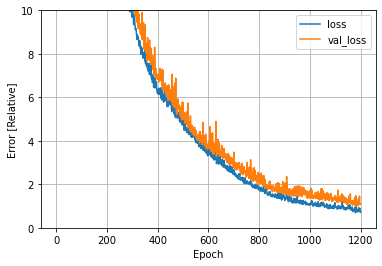

In [19]:
# Plot
plot_loss(history)

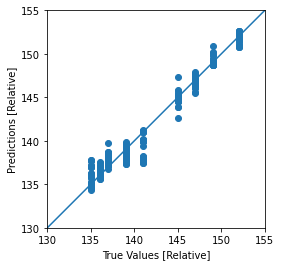

In [20]:
# TensorFlow Tutorial code: use Matplotlib to plot the model predictions against the actual ytest split data 
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Relative]')
plt.ylabel('Predictions [Relative]')
lims = [130, 155]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


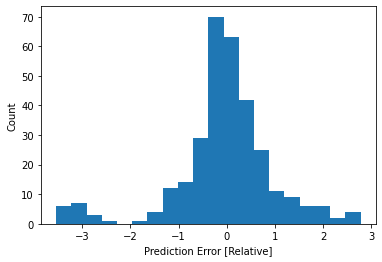

In [21]:
# TensorFlow Tutorial code: use Matplotlib to create a histogram showing the prediction error distribution
error = test_predictions - y_test
plt.hist(error, bins=20)
plt.xlabel('Prediction Error [Relative]')
_ = plt.ylabel('Count')

In [23]:
# Save the entire model as a SavedModel.
#!mkdir -p saved_model
dnn_model.save('saved_model/') 

INFO:tensorflow:Assets written to: saved_model/assets


In [24]:
# Test loading back the model from the saved location
new_model = tf.keras.models.load_model('saved_model/')

new_model.build()
# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 12)                25        
_________________________________________________________________
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [27]:
#history = new_model.fit(
#    X_train, y_train,
#    validation_split=0.2,
#    verbose=0, epochs=1500)

In [28]:
# Test the loaded model using the existing split data to match the results
new_test_results = new_model.evaluate(X_test, y_test, verbose=2)
new_test_results

10/10 - 0s - loss: 1.0961 - mean_absolute_percentage_error: 0.4899


[1.096091866493225, 0.4899024963378906]